# Setup

In [4]:
import pandas as pd
import seaborn as sns
import numpy as np
from matplotlib import pyplot
import plotly.express as px

In C:\Users\Asus\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\Asus\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\Asus\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
In C:\Users\Asus\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The validate_bool_maybe_none function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\Asus\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle

In [5]:
import plotly
print(plotly.__version__)

4.5.2


In [6]:
categories = ['Environment', 'Social', 'Governance']

subcategories_env_pos = ['Climate Impact', 'Biodiversity and Environmental Footprint', 'Waste and Emission Management', 'Environmental Opportunities ','Waste and Emissions Management ']
subcategories_env_neg = ['Greenwashing','Environmental Crime', 'Biodiversity and Environmental Footprint','Climate Impact','Waste and Emission Management','Waste and Emissions Management ']
subcategories_env = subcategories_env_pos + subcategories_env_neg
subcategories_env = list(dict.fromkeys(subcategories_env))

subcategories_soc_pos = ['Human Capital ','Workplace and Product Safety','Cybersecurity','Diversity and Inclusion','Public Relations','Community Opportunities']
subcategories_soc_neg = ['Human Capital ','Workplace and Product Safety','Cybersecurity','Discrimination','Controversial Profile']
subcategories_soc = subcategories_soc_pos + subcategories_soc_neg
subcategories_soc = list(dict.fromkeys(subcategories_soc))

subcategories_gov_pos_neg = ['Business Ethics and Transparency','Board Engagement','Legal Compliance','Product Stewardship']

subcategories = ['Climate Impact', 'Biodiversity and Environmental Footprint', 'Waste and Emission Management', 'Human Capital ', 'Environmental Opportunities ', 'Waste and Emissions Management ', 'Diversity and Inclusion', 'Workplace and Product Safety', 'Environmental Crime', 'Legal Compliance', 'Business Ethics and Transparency', 'Product Stewardship']

# Get data

In [10]:
all_data = pd.read_csv('../ESG model building/Data/posts_esg_final.csv')
print(len(all_data))
all_data['urn'] = all_data['urn'].astype('int64') 

all_data.head()

172


,Unnamed: 0,urn,ts,company,numLikes,numComments,text,Environment,Positive,Climate Impact,...,Human Capital,Environmental Opportunities,Waste and Emission Management,Diversity and Inclusion,Workplace and Product Safety,Environmental Crime,Governance,Legal Compliance,Business Ethics and Transparency,Product Stewardship
0,16,6984440000000000000,08/10/2022 09:01,boeing,280,6,Global cooperation is a beautiful thing 🌎.\r\n...,120.0,120.0,120.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,30,6982130000000000000,02/10/2022 00:00,boeing,498,5,October marks #EnergyAwarenessMonth across the...,10.0,10.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,51,6978020000000000000,20/09/2022 16:04,boeing,4938,77,We predict a windy forecast at #ASC22. 💨\r\n\r...,30.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,61,6973260000000000000,07/09/2022 12:59,boeing,5121,61,Today marks the 25th anniversary of the F-22 R...,15.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,73,6969440000000000000,27/08/2022 23:49,boeing,346,5,#TeamBoeing engineer Kristine Ramos spoke to t...,5.0,5.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
all_data.columns

In [ ]:
all_data['company'].unique()

# Top 5 

## number of likes

In [16]:
top = all_data[['company', 'numLikes']].groupby('company').mean().reset_index().sort_values(by='numLikes', ascending=False).iloc[:5].reset_index().drop(columns=['index'])
top

,company,numLikes
0,boeing,2236.60
1,amgen,1354.50
2,pepsico,472.25
3,jpmorgan,430.00
4,unionpacific,413.00


In [17]:
top_companies = top['company'].tolist()

In [18]:
num_posts = 10
top_data = all_data.loc[all_data['company'].isin(top_companies)]
print(len(top_data))
top_data

24


,Unnamed: 0,urn,ts,company,numLikes,numComments,text,Environment,Positive,Climate Impact,...,Human Capital,Environmental Opportunities,Waste and Emission Management,Diversity and Inclusion,Workplace and Product Safety,Environmental Crime,Governance,Legal Compliance,Business Ethics and Transparency,Product Stewardship
0,16,6984440000000000000,08/10/2022 09:01,boeing,280,6,Global cooperation is a beautiful thing 🌎.\r\n...,120.0,120.0,120.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,30,6982130000000000000,02/10/2022 00:00,boeing,498,5,October marks #EnergyAwarenessMonth across the...,10.0,10.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,51,6978020000000000000,20/09/2022 16:04,boeing,4938,77,We predict a windy forecast at #ASC22. 💨\r\n\r...,30.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,61,6973260000000000000,07/09/2022 12:59,boeing,5121,61,Today marks the 25th anniversary of the F-22 R...,15.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,73,6969440000000000000,27/08/2022 23:49,boeing,346,5,#TeamBoeing engineer Kristine Ramos spoke to t...,5.0,5.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,168,6935640000000000000,26/05/2022 16:59,jpmorgan,312,54,Reducing energy consumption is better for the ...,10.0,10.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,189,6922170000000000000,19/04/2022 13:30,jpmorgan,548,2,Learn how we are leveraging our capital and ex...,5.0,5.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
18,698,6988860000000000000,20/10/2022 14:01,pepsico,248,4,PepsiCo is working hand in hand with farmers a...,50.0,10.0,25.0,...,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
19,711,6983780000000000000,06/10/2022 13:31,pepsico,509,11,"Meagan Smith, PepsiCo’s Global Marketing Direc...",10.0,10.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20,749,6960970000000000000,04/08/2022 14:59,pepsico,542,19,As we work to become net zero emissions by 204...,25.0,25.0,20.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [19]:
data = top_data.copy()

In [22]:
data = data.sort_values(by='numLikes', ascending=False).iloc[:num_posts].reset_index()

num_esg_pos = data['Positive'].value_counts(dropna=True).sum()
num_esg_neg = data['Negative'].value_counts(dropna=True).sum()

cat_counts = dict()
cat_scores = dict()

data['Environmental subcategories'] = 0 
data['Social subcategories'] = 0 
data['Governance subcategories'] = 0 


score_env=0
score_soc=0
score_gov=0

for index, col in enumerate(data):
    if index < (len(data)-1):
        if pd.isna(data.at[index, col]):
            continue 
        else:
            if col in subcategories_env:
                score_env += data.at[index, col] 
            elif col in subcategories_soc:
                score_soc += data.at[index, col]
            elif col in subcategories_gov_pos_neg:
                score_gov += data.at[index, col]
            
            data.at[index, 'Environmental subcategories'] = score_env
            data.at[index, 'Social subcategories'] = score_soc
            data.at[index,'Governance subcategories'] = score_gov
    else: 
        break

for col in categories:
    cat_counts[col] = data[col].value_counts(dropna=True).sum()
    score = data[col].dropna().mean()
    if pd.isna(score):
        score = 0
    cat_scores[col] = score

cat_counts_df = pd.DataFrame({'Category': list(cat_counts.keys()), 'Counts': list(cat_counts.values())})
cat_scores_df = pd.DataFrame({'Category': list(cat_scores.keys()), 'Scores Sum': list(cat_scores.values())})

cat_scores_df = pd.DataFrame({'Category': list(cat_scores.keys()), 'Scores Sum': list(cat_scores.values())})
cat_scores_df = pd.DataFrame({'Category': list(cat_scores.keys()), 'Scores Sum': list(cat_scores.values())})


subcat_counts = dict()
subcat_scores = dict()
subcat_cat = []

for col in subcategories:
    subcat_counts[col] = data[col].value_counts(dropna=True).sum()
    score = data[col].dropna().mean()
    if pd.isna(score):
        score = 0
    subcat_scores[col] = score

for col in subcat_counts:
    if col in subcategories_env:
        subcat_cat.append('Environmental')
    elif col in subcategories_soc:
        subcat_cat.append('Social')
    elif col in subcategories_gov_pos_neg:
        subcat_cat.append('Governance')  
        
cat_individual_scores = dict()

data['ESG total score'] = data[categories].sum(axis=1)

subcat_counts_df = pd.DataFrame({'Category': list(subcat_counts.keys()), 'Counts': list(subcat_counts.values()), 'Main category': subcat_cat})
subcat_scores_df = pd.DataFrame({'Category': list(subcat_scores.keys()), 'Scores Sum': list(subcat_scores.values()),'Main category': subcat_cat})

subcat_counts_df = subcat_counts_df.sort_values(by='Main category')
subcat_scores_df = subcat_scores_df.sort_values(by='Main category')

avg_likes = data['numLikes'].mean()
avg_comments = data['numComments'].mean()

<AxesSubplot:xlabel='Category', ylabel='Counts'>

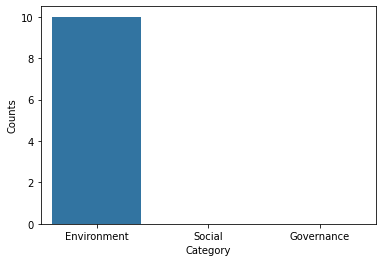

In [23]:
sns.barplot(data=cat_counts_df, x='Category', y='Counts')

# Overall post analysis

In [42]:
option = 'unilever'
num_posts = 10

In [43]:
data = all_data.loc[all_data['company'] == option].copy().sort_values(by='numLikes', ascending=False).iloc[:num_posts].reset_index()

In [44]:
num_esg_pos = data['Positive'].value_counts(dropna=True).sum()
num_esg_neg = data['Negative'].value_counts(dropna=True).sum()

cat_counts = dict()
cat_scores = dict()

data['Environmental subcategories'] = 0 
data['Social subcategories'] = 0 
data['Governance subcategories'] = 0 


score_env=0
score_soc=0
score_gov=0

for index, col in enumerate(data):
    if index < (len(data)-1):
        if pd.isna(data.at[index, col]):
            continue 
        else:
            if col in subcategories_env:
                score_env += data.at[index, col] 
            elif col in subcategories_soc:
                score_soc += data.at[index, col]
            elif col in subcategories_gov_pos_neg:
                score_gov += data.at[index, col]
            
            data.at[index, 'Environmental subcategories'] = score_env
            data.at[index, 'Social subcategories'] = score_soc
            data.at[index,'Governance subcategories'] = score_gov
    else: 
        break

for col in categories:
    cat_counts[col] = data[col].value_counts(dropna=True).sum()
    score = data[col].dropna().mean()
    if pd.isna(score):
        score = 0
    cat_scores[col] = score

cat_counts_df = pd.DataFrame({'Category': list(cat_counts.keys()), 'Counts': list(cat_counts.values())})
cat_scores_df = pd.DataFrame({'Category': list(cat_scores.keys()), 'Scores Sum': list(cat_scores.values())})

cat_scores_df = pd.DataFrame({'Category': list(cat_scores.keys()), 'Scores Sum': list(cat_scores.values())})
cat_scores_df = pd.DataFrame({'Category': list(cat_scores.keys()), 'Scores Sum': list(cat_scores.values())})


subcat_counts = dict()
subcat_scores = dict()
subcat_cat = []

for col in subcategories:
    subcat_counts[col] = data[col].value_counts(dropna=True).sum()
    score = data[col].dropna().mean()
    if pd.isna(score):
        score = 0
    subcat_scores[col] = score

for col in subcat_counts:
    if col in subcategories_env:
        subcat_cat.append('Environmental')
    elif col in subcategories_soc:
        subcat_cat.append('Social')
    elif col in subcategories_gov_pos_neg:
        subcat_cat.append('Governance')  
        
cat_individual_scores = dict()

# data['Environmental category']= data[subcategories_env].sum(axis=1)
# data['Social category']= data[subcategories_soc].sum(axis=1)
# data['Governance category']= data[subcategories_gov_pos_neg].sum(axis=1)

data['ESG total score'] = data[categories].sum(axis=1)

subcat_counts_df = pd.DataFrame({'Category': list(subcat_counts.keys()), 'Counts': list(subcat_counts.values()), 'Main category': subcat_cat})
subcat_scores_df = pd.DataFrame({'Category': list(subcat_scores.keys()), 'Scores Sum': list(subcat_scores.values()),'Main category': subcat_cat})

subcat_counts_df = subcat_counts_df.sort_values(by='Main category')
subcat_scores_df = subcat_scores_df.sort_values(by='Main category')

avg_likes = data['numLikes'].mean()
avg_comments = data['numComments'].mean()


def extract_hashtags(text):
    hashtag_list = []
     
    # splitting the text into words
    for word in text.split():
        if word[0] == '#':
            hashtag_list.append(word[1:])
    return hashtag_list

In [45]:
print(avg_likes, avg_comments)

603.5 21.3


In [46]:
data

,index,Unnamed: 0,urn,ts,company,numLikes,numComments,text,Environment,Positive,...,Workplace and Product Safety,Environmental Crime,Governance,Legal Compliance,Business Ethics and Transparency,Product Stewardship,Environmental subcategories,Social subcategories,Governance subcategories,ESG total score
0,107,3613,6984640000000000000,08/10/2022 22:13,unilever,1248,36,Today we’re heading over to our office in Boni...,10.0,10.0,...,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,10.0
1,116,3676,6969700000000000000,28/08/2022 16:45,unilever,963,15,We’re nearing the end of our logo journey with...,5.0,5.0,...,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,5.0
2,117,3680,6968990000000000000,26/08/2022 18:17,unilever,958,22,Today we’re heading over to our office in Boni...,10.0,10.0,...,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,10.0
3,105,3595,6987180000000000000,15/10/2022 22:47,unilever,907,19,🌍 Ever wondered what the inside of one of our ...,40.0,40.0,...,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,40.0
4,112,3648,6978560000000000000,22/09/2022 03:30,unilever,463,67,We’re proud to have won the Market Trailblazer...,5.0,5.0,...,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,5.0
5,113,3650,6978070000000000000,20/09/2022 19:36,unilever,399,12,We’re transitioning to 100% renewable energy w...,90.0,90.0,...,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,90.0
6,111,3646,6978780000000000000,22/09/2022 18:30,unilever,280,7,Unilever is tackling ice cream’s carbon footpr...,35.0,35.0,...,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,35.0
7,109,3640,6979640000000000000,25/09/2022 03:21,unilever,277,7,"How is Alyson Gruber, Senior Packaging Enginee...",30.0,30.0,...,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,30.0
8,167,3615,6984130000000000000,07/10/2022 12:43,unilever,270,14,What does it mean to be a Formulation Scientis...,10.0,20.0,...,NaN,NaN,20.0,NaN,20.0,NaN,0,0,0,30.0
9,108,3615,6984130000000000000,07/10/2022 12:43,unilever,270,14,What does it mean to be a Formulation Scientis...,10.0,20.0,...,NaN,NaN,20.0,NaN,20.0,NaN,0,0,0,30.0


In [2]:
import autokeras as ak
import numpy as np
import pandas as pd
import tensorflow as tf
from autokeras import TextRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from tensorflow.keras.models import load_model

RuntimeError: module compiled against API version 0xe but this version of numpy is 0xd

ImportError: initialization failed